<a href="https://colab.research.google.com/github/maflorez08/Maira_FlorezBarreiro_KC/blob/main/PROYECTO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# > **PROYECTO FINAL**



El conjunto de datos contiene los principales indicadores de los niveles preescolar, básica y media discriminados por Departamento desde el año 2011 hasta 2020, el úlitmo años es dato preliminar, el resto son datos definitivos oficial.
Este conjunto de datos se puede relacionar con el de matrícula en educación preescolar, básica y media donde se presenta la caracterización de los estudiantes que permiten obtener información para comprender el comportamiento de los indicadores

**Indicadores educativos (Aprobación, Deserción, tasas de cobertura, reprobación y matriculación) desagregado por Departamento**

In [4]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 33.7 MB/s 


### **1. Importación de las librerias**

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sb
import sklearn # Paquete base de ML

from scipy.stats import norm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler


import folium  #needed for interactive map
from folium.plugins import HeatMap
import branca
import geopandas as gpd
import math
from   collections           import Counter
from   sklearn               import preprocessing
from   datetime              import datetime
from   collections           import Counter
from   math                  import exp
from   sklearn.linear_model  import LinearRegression as LinReg
from   sklearn.metrics       import mean_absolute_error
from   sklearn.metrics       import median_absolute_error
from   sklearn.metrics       import r2_score
%matplotlib inline

### **2.importar los datos**

In [9]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [12]:
data = pd.read_csv('/content/gdrive/MyDrive/PROYECTO FINAL/ESTADISTICAS_EDUCACION.csv')
data.head(330)

,AÑO,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,COBERTURA_BRUTA,COBERTURA_BRUTA_TRANSICIÓN,COBERTURA_BRUTA_PRIMARIA,COBERTURA_BRUTA_SECUNDARIA,COBERTURA_BRUTA_MEDIA,TAMAÑO_PROMEDIO_DE_GRUPO,SEDES_CONECTADAS_A_INTERNET,DESERCIÓN,DESERCIÓN_TRANSICIÓN,DESERCIÓN_PRIMARIA,DESERCIÓN_SECUNDARIA,DESERCIÓN_MEDIA,APROBACIÓN,APROBACIÓN_TRANSICIÓN,APROBACIÓN_PRIMARIA,APROBACIÓN_SECUNDARIA,APROBACIÓN_MEDIA,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
0,2015,5,Antioquia,1262800,89.92,89.79,61.07,89.02,74.17,42.61,103.14,79.42,111.00,110.09,82.19,30.39,61.29,3.82,2.86,2.97,5.55,2.80,89.34,96.94,91.59,83.89,91.56,6.84,0.20,5.44,10.56,5.64,2.83,0.20,2.26,4.55,1.95
1,2015,8,Atlántico,520783,86.17,85.92,53.52,82.12,74.28,45.61,93.38,81.92,100.78,95.67,76.02,26.27,88.00,1.39,1.74,1.29,1.57,1.00,95.19,97.20,95.80,93.48,96.78,3.42,1.06,2.90,4.96,2.22,1.69,1.06,1.38,2.42,1.06
2,2015,11,"Bogotá, D.C.",1455309,82.20,81.77,59.17,78.94,74.89,50.61,88.45,73.77,89.14,94.60,81.94,27.56,98.87,3.63,3.48,2.72,4.85,3.20,96.29,96.51,97.25,95.02,96.57,0.09,0.00,0.03,0.12,0.23,9.91,0.00,6.49,16.02,7.94
3,2015,13,Bolívar,488886,88.78,88.69,58.50,87.33,71.05,39.34,100.18,98.61,111.11,100.44,73.44,23.02,44.94,3.01,3.16,2.54,3.75,2.69,91.50,96.06,92.85,88.10,92.34,5.49,0.78,4.61,8.15,4.97,1.83,0.78,1.74,2.46,0.92
4,2015,15,Boyacá,284611,83.62,83.57,63.02,80.65,74.22,48.61,93.37,82.10,92.12,101.30,85.47,25.17,22.96,2.22,1.80,1.39,3.19,2.32,93.27,97.91,95.64,89.72,93.39,4.51,0.29,2.97,7.09,4.29,2.27,0.29,1.46,3.68,2.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,2020,91,Amazonas,22563,81.26,81.24,50.16,79.55,60.21,30.42,94.99,90.51,102.71,96.86,72.20,NaN,NaN,2.37,6.46,0.75,3.60,2.83,88.72,93.48,94.52,81.30,79.26,8.91,0.06,4.73,15.10,17.91,10.00,0.06,10.63,12.25,6.80
326,2020,94,Guainía,15771,70.52,70.51,55.92,69.96,33.54,10.73,83.91,96.50,105.58,72.40,43.18,NaN,NaN,3.53,5.18,3.49,3.13,3.04,81.46,90.67,84.51,72.31,79.50,15.01,4.16,12.01,24.57,17.45,10.50,4.16,11.43,13.99,3.60
327,2020,95,Guaviare,21482,83.07,83.06,43.30,76.41,67.80,34.28,100.72,81.17,103.18,111.13,83.61,NaN,NaN,4.41,3.09,3.27,5.81,6.32,86.67,95.66,91.56,78.61,83.32,8.92,1.25,5.17,15.58,10.36,6.04,1.25,5.45,8.77,3.37
328,2020,97,Vaupés,15910,53.47,53.47,30.55,54.96,31.22,13.32,62.80,43.80,78.15,58.55,40.98,NaN,NaN,2.54,2.88,2.11,2.80,4.09,81.18,90.45,79.57,82.34,81.14,16.28,6.67,18.32,14.86,14.76,7.15,6.67,7.86,7.44,5.08


# **3.analisis dataset**

### **que hay en el dataset**

In [ ]:
dimenciones

In [13]:
data.shape

(330, 37)

### **Columnas en este Dataset**


1.   AÑO	
Vigencia del indicador
2.  CÓDIGO_DEPARTAMENTO	
Código DANE del Departamento
3. DEPARTAMENTO	
Nombre del Departamento
4. POBLACIÓN_5_16	
Población en edad teórica de estudiar (5 a 16 años) según proyecciones de población del DANE
5. TASA_MATRICULACIÓN_5_16	
Proporción de la población entre 5 y 16 años que se encuentra asistiendo al sistema educativo. Cuando las proyecciones de población del DANE no capturan adecuadamente los flujos migratorios internos, puede alcanzar valores mayores al 100%
6. COBERTURA_NETA	
Es la relación entre el número de estudiantes matriculados en transición, primaria, secundaria y media que tienen la edad teórica (5 a 16 años) y el total de la población correspondiente a esa misma edad. Cuando las proyecciones de población del DANE no capturan adecuadamente los flujos migratorios internos, puede alcanzar valores mayores al 100%.
7. COBERTURA_NETA_TRANSICIÓN	
Es la relación entre el número de estudiantes matriculados en transición que tienen la edad teórica para cursar este nivel (5 años) y el total de la población correspondiente a esa misma edad. Cuando las proyecciones de población del DANE no capturan adecuadamente los flujos migratorios internos, puede alcanzar valores mayores al 100%.
8. COBERTURA_NETA_PRIMARIA	
Es la relación entre el número de estudiantes matriculados en primaria que tienen la edad teórica para cursar este nivel (6 a 10 años) y el total de la población correspondiente a esa misma edad. Cuando las proyecciones de población del DANE no capturan adecuadamente los flujos migratorios internos, puede alcanzar valores mayores al 100%.
9. COBERTURA_NETA_SECUNDARIA	
Es la relación entre el número de estudiantes matriculados en secundaria que tienen la edad teórica para cursar este nivel (11 a 14 años) y el total de la población correspondiente a esa misma edad. Cuando las proyecciones de población del DANE no capturan adecuadamente los flujos migratorios internos, puede alcanzar valores mayores al 100%.
10. COBERTURA_NETA_MEDIA	
Es la relación entre el número de estudiantes matriculados en media que tienen la edad teórica para cursar este nivel (15 a 16 años) y el total de la población correspondiente a esa misma edad. Cuando las proyecciones de población del DANE no capturan adecuadamente los flujos migratorios internos, puede alcanzar valores mayores al 100%.
11. COBERTURA_BRUTA	
Es la relación entre el número de estudiantes matriculados en transición, primaria, secundaria y media respecto a la población en edad teórica para cursar estos niveles (5 a 16 años). En algunos casos la demanda social es mayor a la población en edad teórica para cursar educación preescolar, básica y media (5 a 16 años), explicada por estudiantes en extraedad, por lo que el indicador toma valores superiores al 100%.
12. Es la relación entre el número de estudiantes matriculados en transición respecto a la población en edad teórica para cursar este nivel (5 años). En algunos casos la demanda social es mayor a la población en edad teórica para cursar este nivel (5 años), explicada por estudiantes en extraedad, por lo que el indicador toma valores superiores al 100%.
13. COBERTURA_BRUTA_PRIMARIA	
Es la relación entre el número de estudiantes matriculados en primaria respecto a la población en edad teórica para cursar este nivel (6 a 10 años). En algunos casos la demanda social es mayor a la población en edad teórica para cursar este nivel (6 a 10 años), explicada por estudiantes en extraedad, por lo que el indicador toma valores superiores al 100%.
14. COBERTURA_BRUTA_SECUNDARIA	
Es la relación entre el número de estudiantes matriculados en secundaria respecto a la población en edad teórica para cursar este nivel (11 a 14 años). En algunos casos la demanda social es mayor a la población en edad teórica para cursar este nivel (11 a 14 años), explicada por estudiantes en extraedad, por lo que el indicador toma valores superiores al 100%.
15. COBERTURA_BRUTA_MEDIA	
Es la relación entre el número de estudiantes matriculados en media respecto a la población en edad teórica para cursar este nivel (15 a 16 años). En algunos casos la demanda social es mayor a la población en edad teórica para cursar este nivel (15 a 16 años), explicada por estudiantes en extraedad, por lo que el indicador toma valores superiores al 100%.
16. TAMAÑO_PROMEDIO_DE_GRUPO	
Corresponde al número promedio de estudiantes por grupo. Para su cálculo considera la matrícula y el número de grupos tanto del sector oficial como del no oficial
17. SEDES_CONECTADAS_A_INTERNET	
Indica el porcentaje de sedes oficiales de Una Entidad Territorial Certificada que se encuentran conectadas a una red de Internet.
18. DESERCIÓN	
Tasa de deserción intra - anual del sector oficial. Identifica la proporción de alumnos matriculados que por factores culturales, coyunturales o de prestación del servicio educativo, abandonan sus estudios durante el año lectivo.
19. DESERCIÓN_TRANSICIÓN	
Tasa de deserción intra - anual del sector oficial en transición. Identifica la proporción de alumnos matriculados que por factores culturales, coyunturales o de prestación del servicio educativo, abandonan sus estudios durante el año lectivo.
20. DESERCIÓN_PRIMARIA	
Tasa de deserción intra - anual del sector oficial en primaria. Identifica la proporción de alumnos matriculados que por factores culturales, coyunturales o de prestación del servicio educativo, abandonan sus estudios durante el año lectivo.
21. DESERCIÓN_SECUNDARIA	
Tasa de deserción intra - anual del sector oficial en secundaria. Identifica la proporción de alumnos matriculados que por factores culturales, coyunturales o de prestación del servicio educativo, abandonan sus estudios durante el año lectivo.
22. DESERCIÓN_MEDIA	
Tasa de deserción intra - anual del sector oficial en media. Identifica la proporción de alumnos matriculados que por factores culturales, coyunturales o de prestación del servicio educativo, abandonan sus estudios durante el año lectivo.
23. APROBACIÓN	
Tasa de aprobación de estudiantes del sector oficial. Identifica el porcentaje de alumnos en educación preescolar, básica y media que aprueba de acuerdo con los planes y programas de estudio vigentes.
24. APROBACIÓN_TRANSICIÓN	
Tasa de aprobación de estudiantes del sector oficial en transición. Identifica el porcentaje de alumnos en este nivel educativo que aprueba de acuerdo con los planes y programas de estudio vigentes.
25. APROBACIÓN_PRIMARIA	
Tasa de aprobación de estudiantes del sector oficial en primaria. Identifica el porcentaje de alumnos en este nivel educativo que aprueba de acuerdo con los planes y programas de estudio vigentes.
APROBACIÓN_SECUNDARIA	
26. Tasa de aprobación de estudiantes del sector oficial en secundaria. Identifica el porcentaje de alumnos en este nivel educativo que aprueba de acuerdo con los planes y programas de estudio vigentes.
27. APROBACIÓN_MEDIA	
Tasa de aprobación de estudiantes del sector oficial en media. Identifica el porcentaje de alumnos en este nivel educativo que aprueba de acuerdo con los planes y programas de estudio vigentes.
28. REPROBACIÓN	
Tasa de reprobación de estudiantes del sector oficial. Identifica el porcentaje de alumnos en educación preescolar, básica y media que reprueba de acuerdo con los planes y programas de estudio vigentes.
29. REPROBACIÓN_TRANSICIÓN	
Tasa de reprobación de estudiantes del sector oficial en transición. Identifica el porcentaje de alumnos en este nivel educativo que reprueba de acuerdo con los planes y programas de estudio vigentes.
30. REPROBACIÓN_PRIMARIA	
Tasa de reprobación de estudiantes del sector oficial en primaria. Identifica el porcentaje de alumnos en este nivel educativo que reprueba de acuerdo con los planes y programas de estudio vigentes.
REPROBACIÓN_SECUNDARIA	
31. Tasa de reprobación de estudiantes del sector oficial en secundaria. Identifica el porcentaje de alumnos en este nivel educativo que reprueba de acuerdo con los planes y programas de estudio vigentes.
32. REPROBACIÓN_MEDIA	
 Tasa de reprobación de estudiantes del sector oficial en media. Identifica el porcentaje de alumnos en este nivel educativo que reprueba de acuerdo con los planes y programas de estudio vigentes.
33. REPITENCIA	
Tasa de repitencia del sector oficial. Corresponde al porcentaje de alumnos matriculados en un año escolar en transición, primaria, secundaria y media que se encuentran repitiendo el mismo grado cursado el año anterior.
34. REPITENCIA_TRANSICIÓN	
Tasa de repitencia del sector oficial. Corresponde al porcentaje de alumnos matriculados en transición que se encuentran repitiendo el mismo grado cursado el año anterior.
35. REPITENCIA_PRIMARIA	
Tasa de repitencia del sector oficial. Corresponde al porcentaje de alumnos matriculados en primaria que se encuentran repitiendo el mismo grado cursado el año anterior.
36. REPITENCIA_SECUNDARIA	
Tasa de repitencia del sector oficial. Corresponde al porcentaje de alumnos matriculados en secundaria que se encuentran repitiendo el mismo grado cursado el año anterior.
37. REPITENCIA_MEDIA	
Tasa de repitencia del sector oficial. Corresponde al porcentaje de alumnos matriculados en media que se encuentran repitiendo el mismo grado cursado el año anterior.


In [14]:
data.isnull().sum()

AÑO                             0
CÓDIGO_DEPARTAMENTO             0
DEPARTAMENTO                    0
POBLACIÓN_5_16                  0
TASA_MATRICULACIÓN_5_16         0
COBERTURA_NETA                  0
COBERTURA_NETA_TRANSICIÓN       0
COBERTURA_NETA_PRIMARIA         0
COBERTURA_NETA_SECUNDARIA       0
COBERTURA_NETA_MEDIA            0
COBERTURA_BRUTA                 0
COBERTURA_BRUTA_TRANSICIÓN      0
COBERTURA_BRUTA_PRIMARIA        0
COBERTURA_BRUTA_SECUNDARIA      0
COBERTURA_BRUTA_MEDIA           0
TAMAÑO_PROMEDIO_DE_GRUPO       99
SEDES_CONECTADAS_A_INTERNET    99
DESERCIÓN                       0
DESERCIÓN_TRANSICIÓN            1
DESERCIÓN_PRIMARIA              0
DESERCIÓN_SECUNDARIA            0
DESERCIÓN_MEDIA                 0
APROBACIÓN                      0
APROBACIÓN_TRANSICIÓN           0
APROBACIÓN_PRIMARIA             0
APROBACIÓN_SECUNDARIA           0
APROBACIÓN_MEDIA                0
REPROBACIÓN                     0
REPROBACIÓN_TRANSICIÓN          0
REPROBACIÓN_PR

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   AÑO                          330 non-null    int64  
 1   CÓDIGO_DEPARTAMENTO          330 non-null    int64  
 2   DEPARTAMENTO                 330 non-null    object 
 3   POBLACIÓN_5_16               330 non-null    int64  
 4   TASA_MATRICULACIÓN_5_16      330 non-null    float64
 5   COBERTURA_NETA               330 non-null    float64
 6   COBERTURA_NETA_TRANSICIÓN    330 non-null    float64
 7   COBERTURA_NETA_PRIMARIA      330 non-null    float64
 8   COBERTURA_NETA_SECUNDARIA    330 non-null    float64
 9   COBERTURA_NETA_MEDIA         330 non-null    float64
 10  COBERTURA_BRUTA              330 non-null    float64
 11  COBERTURA_BRUTA_TRANSICIÓN   330 non-null    float64
 12  COBERTURA_BRUTA_PRIMARIA     330 non-null    float64
 13  COBERTURA_BRUTA_SECU

In [16]:
print(data.count)

<bound method DataFrame.count of       AÑO  CÓDIGO_DEPARTAMENTO  ... REPITENCIA_SECUNDARIA  REPITENCIA_MEDIA
0    2015                    5  ...                  4.55              1.95
1    2015                    8  ...                  2.42              1.06
2    2015                   11  ...                 16.02              7.94
3    2015                   13  ...                  2.46              0.92
4    2015                   15  ...                  3.68              2.07
..    ...                  ...  ...                   ...               ...
325  2020                   91  ...                 12.25              6.80
326  2020                   94  ...                 13.99              3.60
327  2020                   95  ...                  8.77              3.37
328  2020                   97  ...                  7.44              5.08
329  2020                   99  ...                  9.62              3.93

[330 rows x 37 columns]>


### **serie de tiempo**

In [17]:
data['AÑO'].value_counts()

2020    33
2019    33
2018    33
2017    33
2016    33
2015    33
2014    33
2013    33
2012    33
2011    33
Name: AÑO, dtype: int64

In [52]:
datatime = pd.read_csv('/content/gdrive/MyDrive/PROYECTO FINAL/ESTADISTICAS_EDUCACION.csv', index_col=['AÑO'], parse_dates=['AÑO'])
datatime.head(330)

,CÓDIGO_DEPARTAMENTO,DEPARTAMENTO,POBLACIÓN_5_16,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_NETA_TRANSICIÓN,COBERTURA_NETA_PRIMARIA,COBERTURA_NETA_SECUNDARIA,COBERTURA_NETA_MEDIA,COBERTURA_BRUTA,COBERTURA_BRUTA_TRANSICIÓN,COBERTURA_BRUTA_PRIMARIA,COBERTURA_BRUTA_SECUNDARIA,COBERTURA_BRUTA_MEDIA,TAMAÑO_PROMEDIO_DE_GRUPO,SEDES_CONECTADAS_A_INTERNET,DESERCIÓN,DESERCIÓN_TRANSICIÓN,DESERCIÓN_PRIMARIA,DESERCIÓN_SECUNDARIA,DESERCIÓN_MEDIA,APROBACIÓN,APROBACIÓN_TRANSICIÓN,APROBACIÓN_PRIMARIA,APROBACIÓN_SECUNDARIA,APROBACIÓN_MEDIA,REPROBACIÓN,REPROBACIÓN_TRANSICIÓN,REPROBACIÓN_PRIMARIA,REPROBACIÓN_SECUNDARIA,REPROBACIÓN_MEDIA,REPITENCIA,REPITENCIA_TRANSICIÓN,REPITENCIA_PRIMARIA,REPITENCIA_SECUNDARIA,REPITENCIA_MEDIA
AÑO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,5,Antioquia,1262800,89.92,89.79,61.07,89.02,74.17,42.61,103.14,79.42,111.00,110.09,82.19,30.39,61.29,3.82,2.86,2.97,5.55,2.80,89.34,96.94,91.59,83.89,91.56,6.84,0.20,5.44,10.56,5.64,2.83,0.20,2.26,4.55,1.95
2015-01-01,8,Atlántico,520783,86.17,85.92,53.52,82.12,74.28,45.61,93.38,81.92,100.78,95.67,76.02,26.27,88.00,1.39,1.74,1.29,1.57,1.00,95.19,97.20,95.80,93.48,96.78,3.42,1.06,2.90,4.96,2.22,1.69,1.06,1.38,2.42,1.06
2015-01-01,11,"Bogotá, D.C.",1455309,82.20,81.77,59.17,78.94,74.89,50.61,88.45,73.77,89.14,94.60,81.94,27.56,98.87,3.63,3.48,2.72,4.85,3.20,96.29,96.51,97.25,95.02,96.57,0.09,0.00,0.03,0.12,0.23,9.91,0.00,6.49,16.02,7.94
2015-01-01,13,Bolívar,488886,88.78,88.69,58.50,87.33,71.05,39.34,100.18,98.61,111.11,100.44,73.44,23.02,44.94,3.01,3.16,2.54,3.75,2.69,91.50,96.06,92.85,88.10,92.34,5.49,0.78,4.61,8.15,4.97,1.83,0.78,1.74,2.46,0.92
2015-01-01,15,Boyacá,284611,83.62,83.57,63.02,80.65,74.22,48.61,93.37,82.10,92.12,101.30,85.47,25.17,22.96,2.22,1.80,1.39,3.19,2.32,93.27,97.91,95.64,89.72,93.39,4.51,0.29,2.97,7.09,4.29,2.27,0.29,1.46,3.68,2.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,91,Amazonas,22563,81.26,81.24,50.16,79.55,60.21,30.42,94.99,90.51,102.71,96.86,72.20,NaN,NaN,2.37,6.46,0.75,3.60,2.83,88.72,93.48,94.52,81.30,79.26,8.91,0.06,4.73,15.10,17.91,10.00,0.06,10.63,12.25,6.80
2020-01-01,94,Guainía,15771,70.52,70.51,55.92,69.96,33.54,10.73,83.91,96.50,105.58,72.40,43.18,NaN,NaN,3.53,5.18,3.49,3.13,3.04,81.46,90.67,84.51,72.31,79.50,15.01,4.16,12.01,24.57,17.45,10.50,4.16,11.43,13.99,3.60
2020-01-01,95,Guaviare,21482,83.07,83.06,43.30,76.41,67.80,34.28,100.72,81.17,103.18,111.13,83.61,NaN,NaN,4.41,3.09,3.27,5.81,6.32,86.67,95.66,91.56,78.61,83.32,8.92,1.25,5.17,15.58,10.36,6.04,1.25,5.45,8.77,3.37


In [57]:
datatime['DEPARTAMENTO']=data['DEPARTAMENTO'].replace(['SAN ANDRES Y PROVIDENCIA'], 'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA')

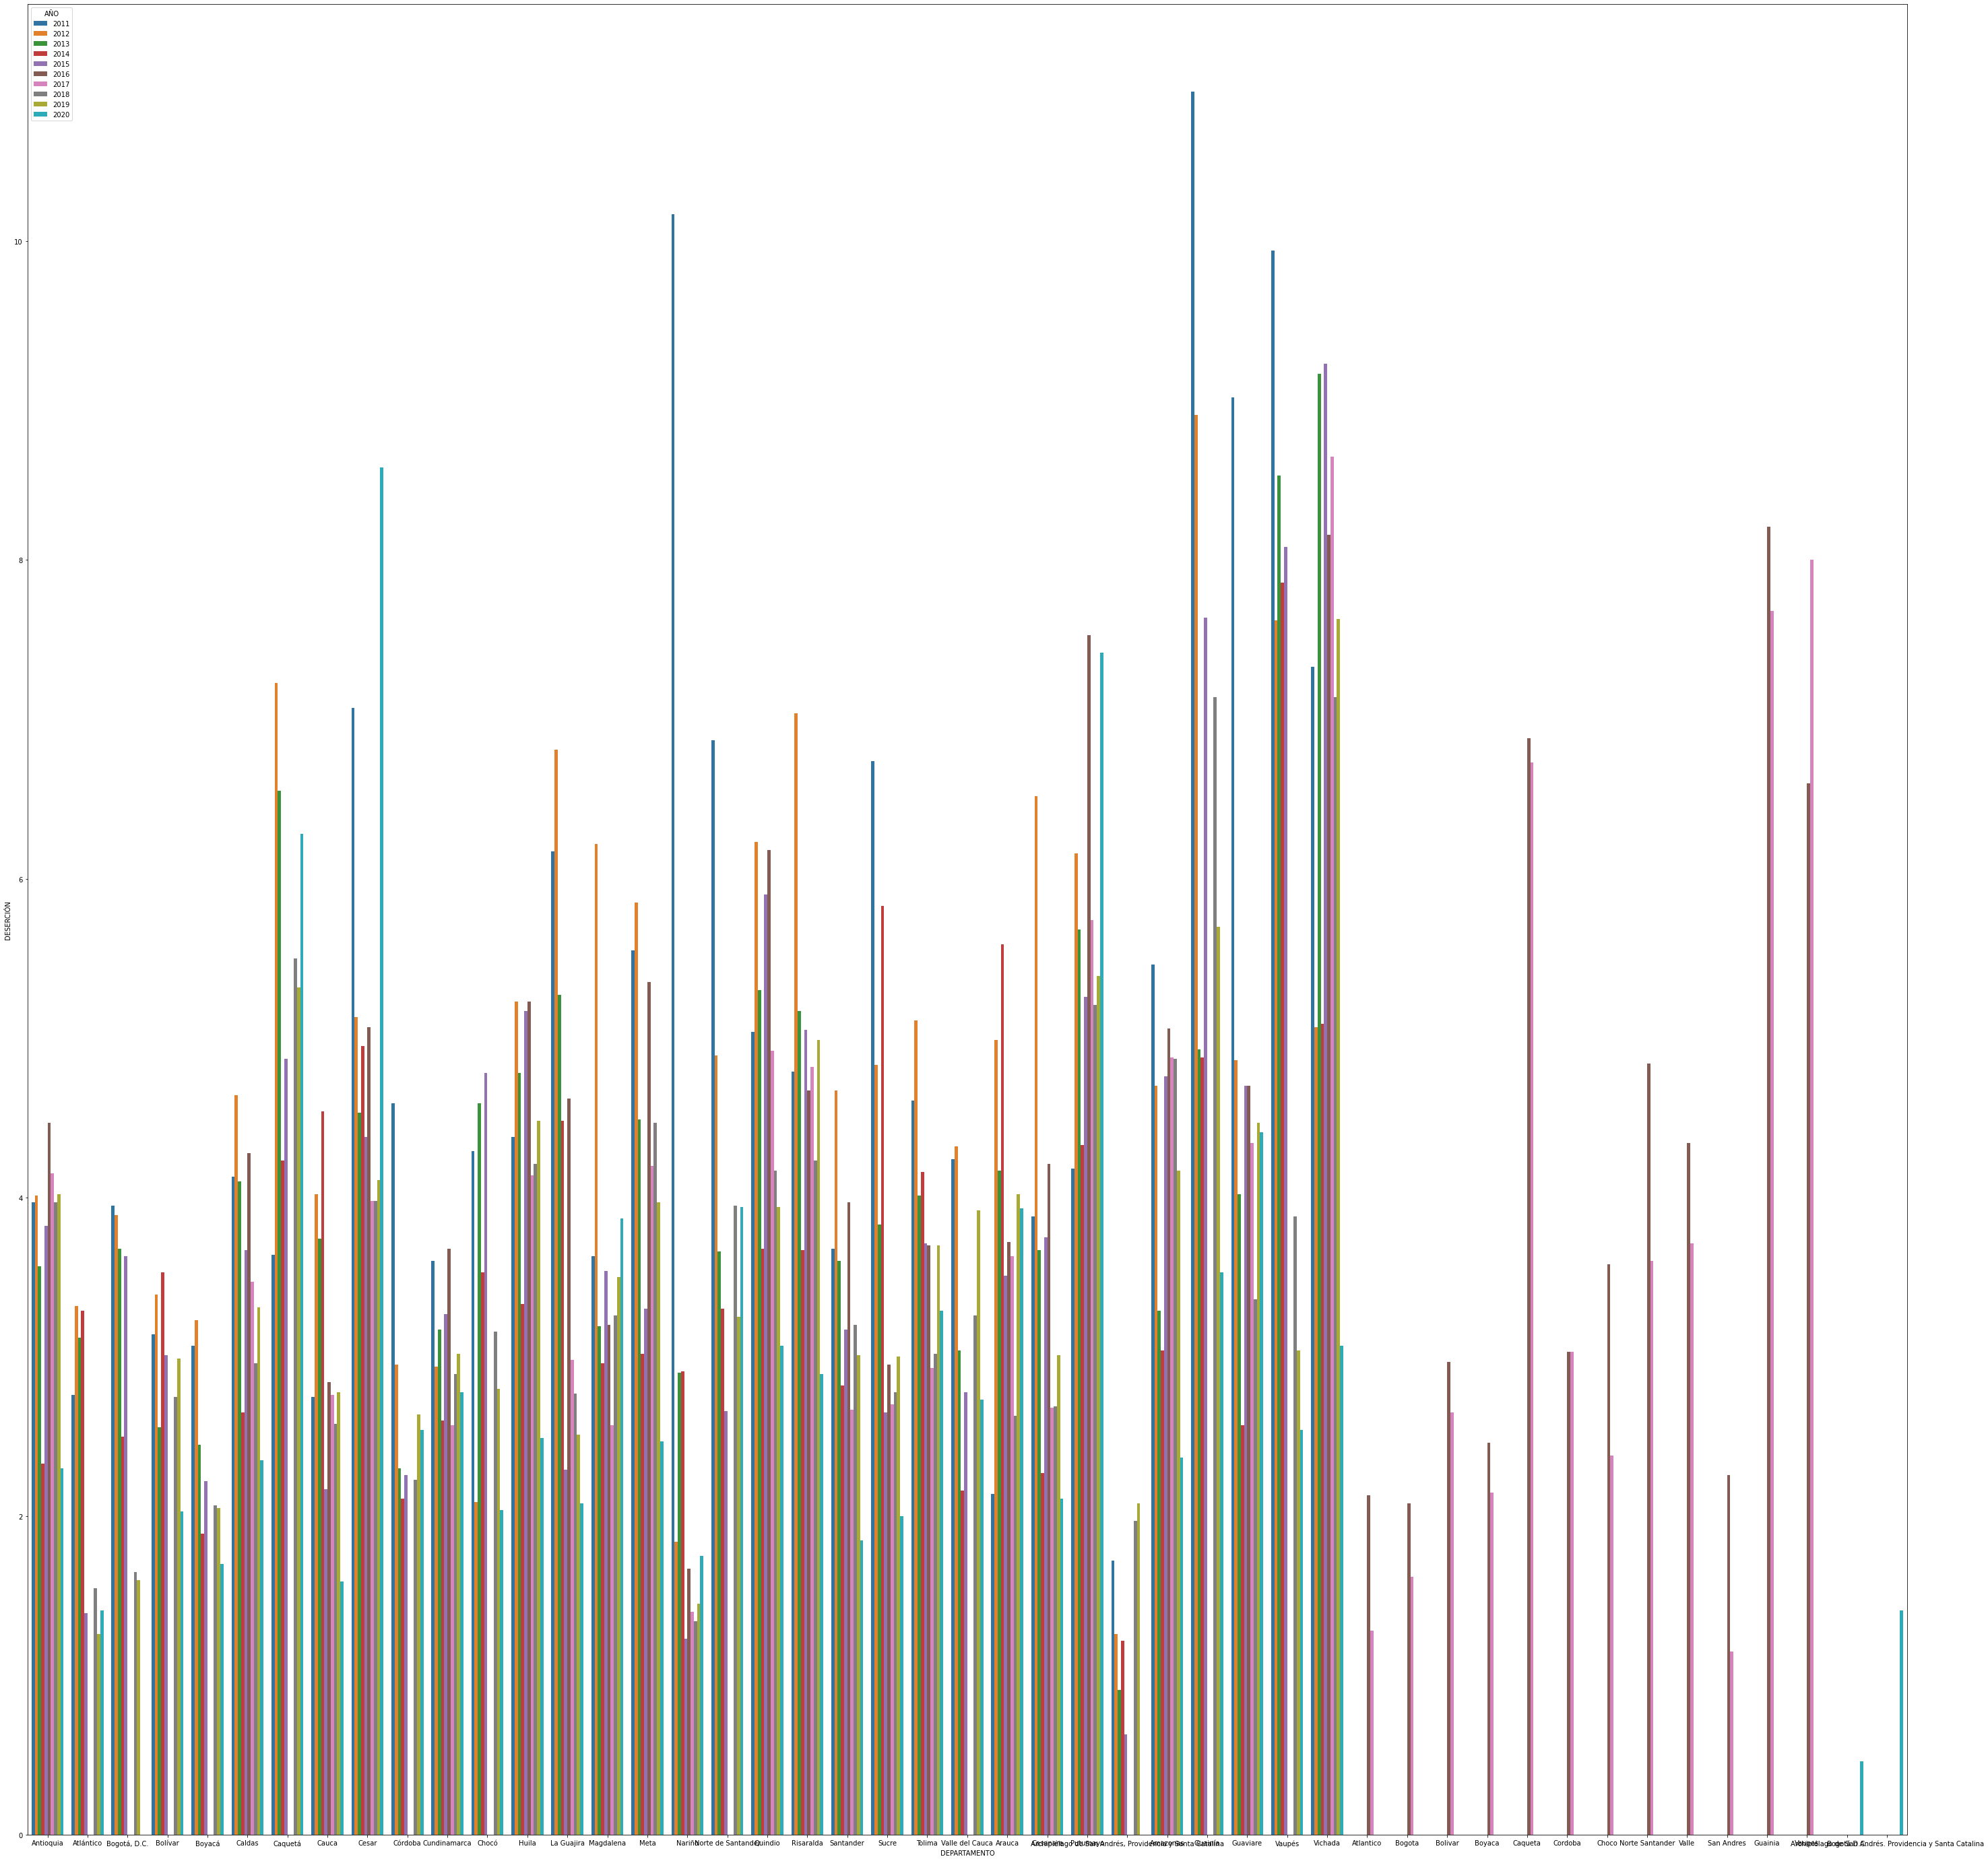

In [58]:
plt.figure(figsize=(50,50))
sb.barplot(x='DEPARTAMENTO',y='DESERCIÓN',data=data,hue='AÑO',ci=False)

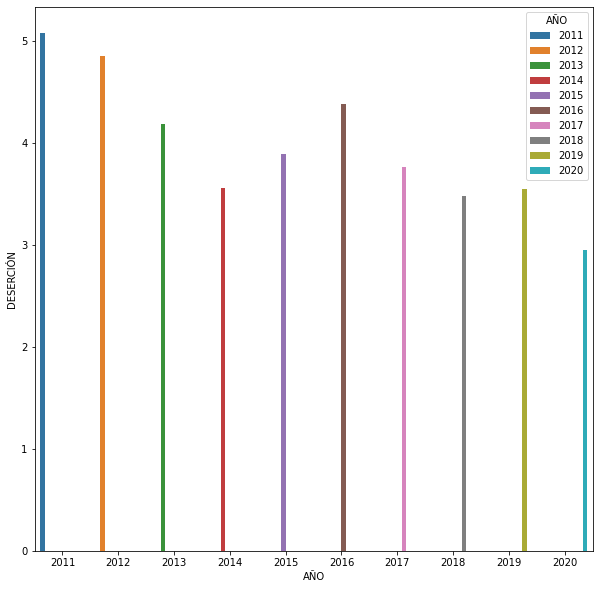

In [61]:
plt.figure(figsize=(10,10))
sb.barplot(x='AÑO',y='DESERCIÓN',data=data,hue='AÑO',ci=False)

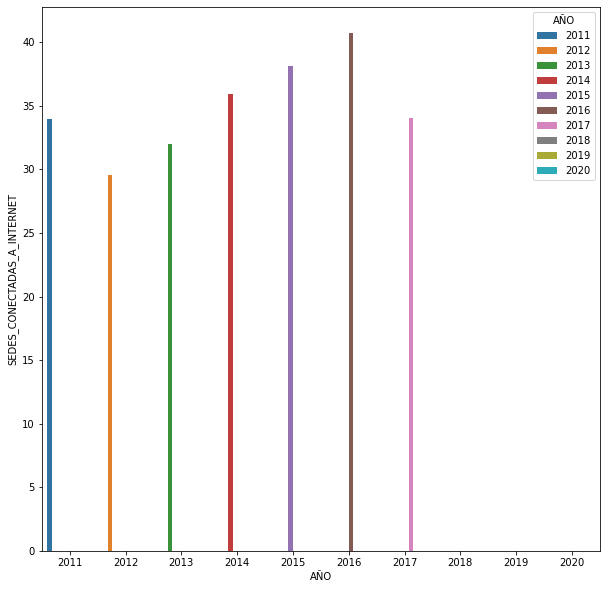

In [69]:
plt.figure(figsize=(10,10))
sb.barplot(x='AÑO',y='SEDES_CONECTADAS_A_INTERNET',data=data,hue='AÑO',ci=False)

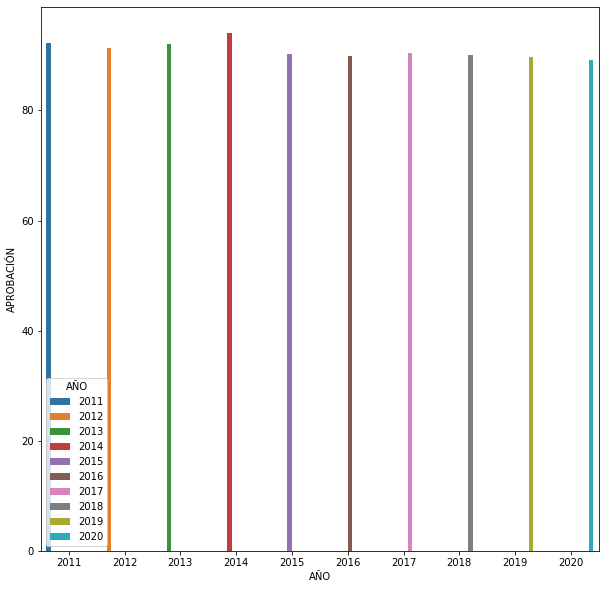

In [70]:
plt.figure(figsize=(10,10))
sb.barplot(x='AÑO',y='APROBACIÓN',data=data,hue='AÑO',ci=False)

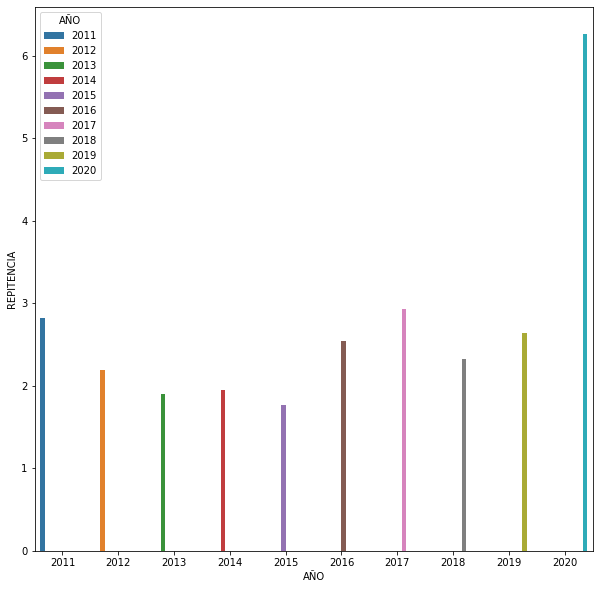

In [72]:
plt.figure(figsize=(10,10))
sb.barplot(x='AÑO',y='REPITENCIA',data=data,hue='AÑO',ci=False)

**CONCLUCIONES**
la desercion academica ha bajado  respecto a años anteriores pero se ve un alza en estidiantes que repiten año, en el 2020 puede ser una respuesta a que aunque hay sedes conectada a internet al ser un año en pandemia los estudiantes no tienen conectividad propia, y aunque no se den de baja de la institucio no cumplen con los requisitos para aprobar 